In [546]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Activation,
    Flatten,
    MaxPool2D,
    Conv2D,
)
from PIL import Image
import cv2

In [547]:
tf.__version__

'2.10.0'

In [548]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [549]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [550]:
X_train.shape

(60000, 28, 28)

In [551]:
y_train.shape

(60000,)

In [552]:
X_test.shape

(10000, 28, 28)

In [553]:
y_test.shape

(10000,)

In [554]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

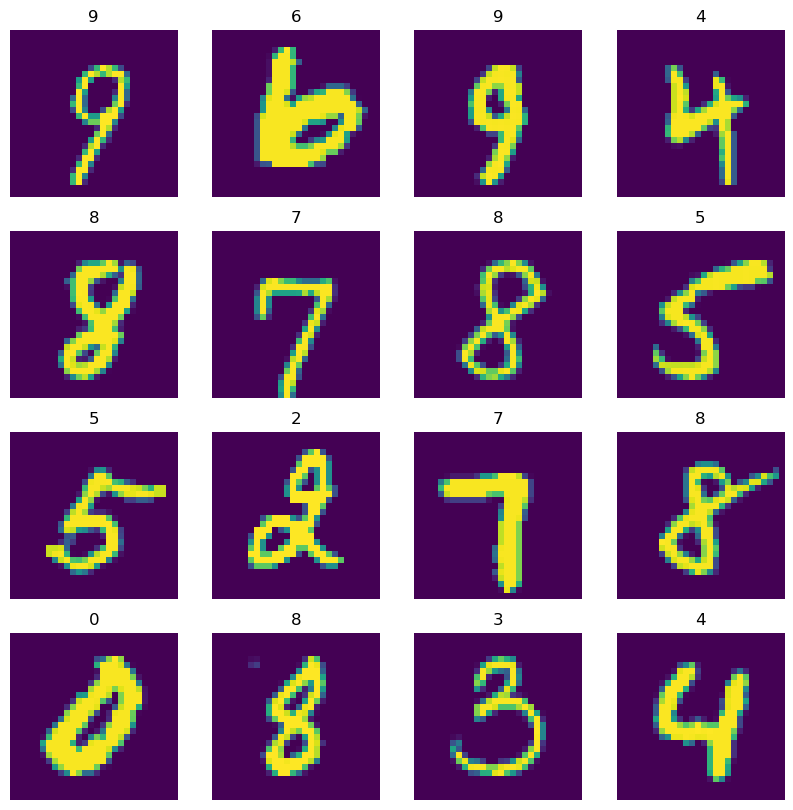

In [555]:
plt.figure(figsize=(10,10))
for i in range(16):
    index=randint(0,59999)
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(y_train[index])
    plt.imshow(X_train[index])

In [556]:
model=tf.keras.Sequential()

In [557]:
model.add(Conv2D(filters=8,kernel_size=(3,3),input_shape=(28,28,1),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation='softmax'))

In [558]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [559]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [560]:
with tf.device('/gpu:0'):
    hist=model.fit(X_train,y_train,batch_size=8,epochs=5,verbose=1)

Epoch 1/5
7500/7500 [==============================] - 47s 6ms/step - loss: 0.3628 - accuracy: 0.8890
Epoch 2/5
7500/7500 [==============================] - 46s 6ms/step - loss: 0.1588 - accuracy: 0.9572
Epoch 3/5
7500/7500 [==============================] - 45s 6ms/step - loss: 0.1224 - accuracy: 0.9676
Epoch 4/5
7500/7500 [==============================] - 45s 6ms/step - loss: 0.1024 - accuracy: 0.9719
Epoch 5/5
7500/7500 [==============================] - 54s 7ms/step - loss: 0.0929 - accuracy: 0.9750


In [561]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0523 - accuracy: 0.9850


[0.05233127996325493, 0.9850000143051147]

Text(0, 0.5, 'loss')

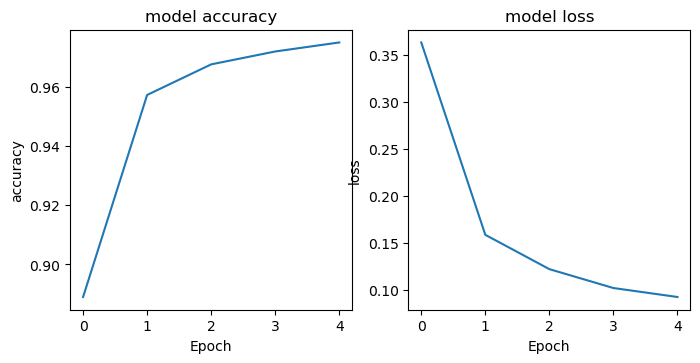

In [562]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("model accuracy")
plt.plot(hist.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.subplot(2,2,2)
plt.title("model loss")
plt.plot(hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")

1/1 [==============================] - 0s 21ms/step


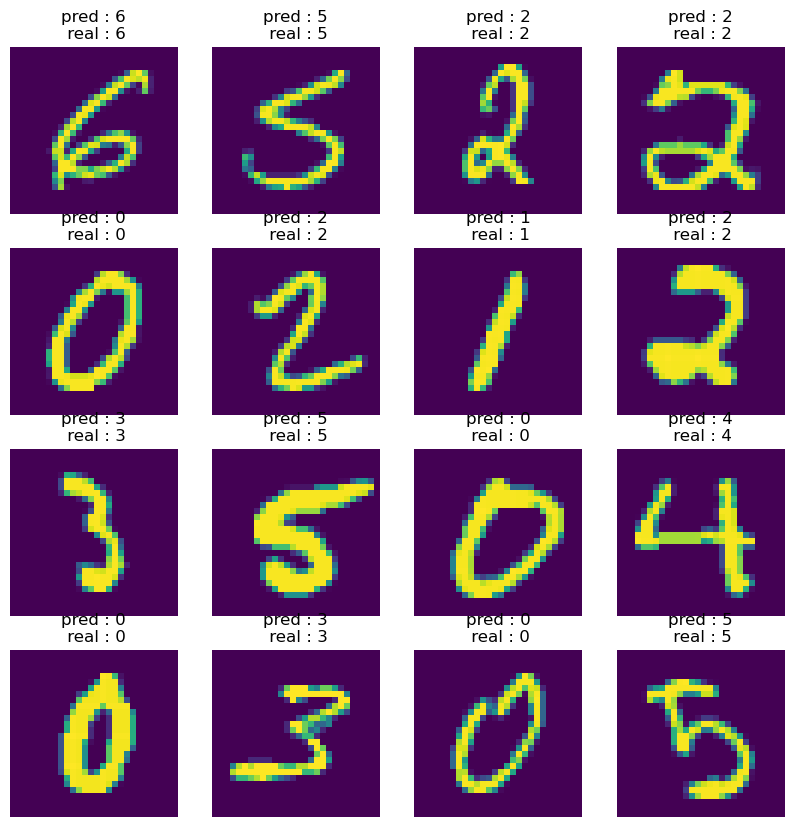

In [563]:
labels=list(set(y_test))
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    index = randint(0, 9999)
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index])
    plt.axis("off")
    plt.title(
        label="pred : "
        + str(labels[np.argmax(model.predict(tf.expand_dims(X_test[index], 0)))])
        + "\n real : "
        + str(labels[y_test[index]])
    )

In [564]:
#model=tf.keras.models.load_model("model.h5")

In [565]:
test = cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)

test = cv2.resize(test, (28, 28), interpolation=cv2.INTER_LINEAR)

test = cv2.bitwise_not(test)

test=test.reshape(*(28,28,-1))

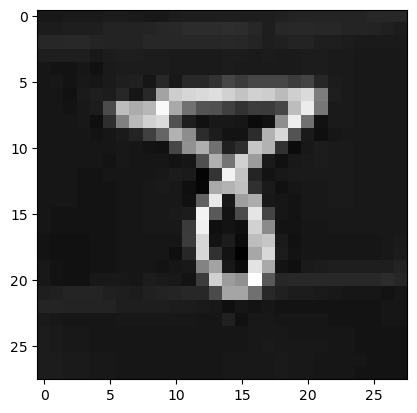

In [566]:
plt.imshow(test,cmap='gray')

In [567]:
np.argmax(model.predict(np.expand_dims(test,axis=0)))

1/1 [==============================] - 0s 123ms/step


8

In [568]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


<Axes: >

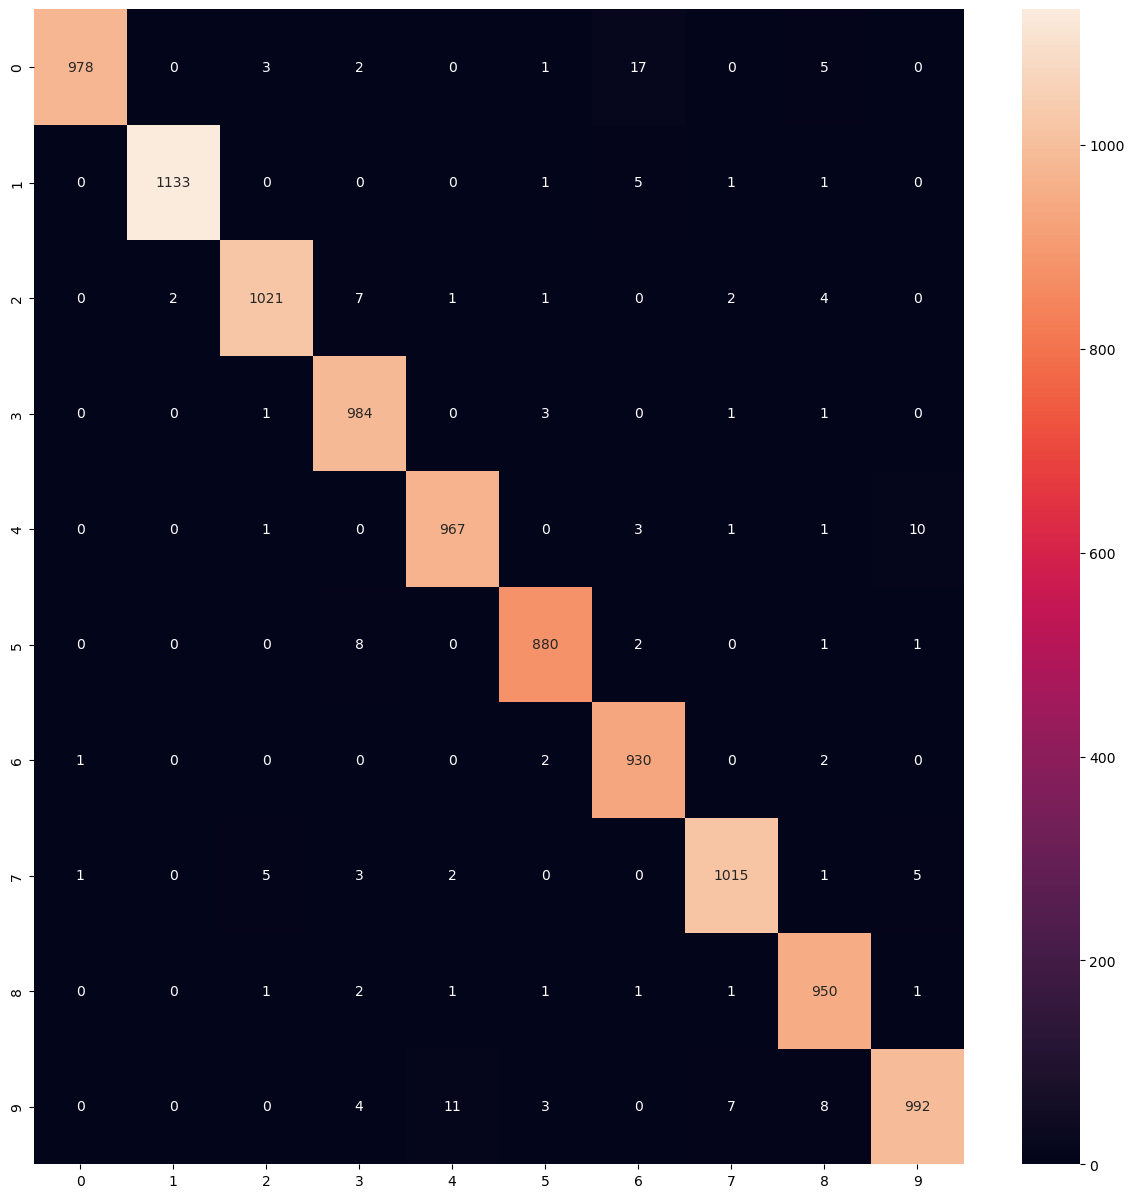

In [569]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d")

In [570]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [572]:
# model.save("model.h5")